# Beispiel Plots - Grundlagen des machinellen Lernens (Machine Learning)

In dieser Notebook Datei wird der Code vorgestellt, der für die Plots im Blogartikel <a href="">test</a> genutzt wurde. 
<br>
Die unten genannten Python-Code Beispiele habe ich mir von ChatGPT 4 erstellen lassen. 

## Beispiel Plot - Einführungstext: lineare Regression

In diesem Code erstellen wir zuerst zufällige Beispieldaten. Dann erstellen und trainieren wir ein LinearRegression Modell mit diesen Daten. Nach dem Training verwenden wir das Modell, um eine Vorhersagelinie für den gesamten Bereich unserer Daten zu erstellen. Schließlich plotten wir sowohl die ursprünglichen Daten als auch die Vorhersagelinie.

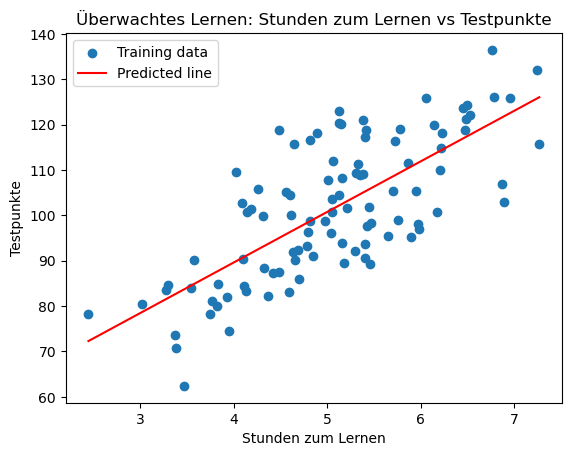

In [1]:
# Import von notwendigen Biliotheken
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Erstellen von Beispieldaten
np.random.seed(0)
x = np.random.normal(5, 1, 100)  # Stunden zum Lernen
y = np.random.normal(50, 10, 100) + x*10  # Testpunkte

# Modell erstellen und trainieren
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)

# Vorhersage für den Plot erstellen
x_new = np.linspace(x.min(), x.max(), 100)
y_new = model.predict(x_new.reshape(-1, 1))

# Daten und Vorhersagelinie plotten
plt.scatter(x, y, label='Training data')
plt.plot(x_new, y_new, color='red', label='Predicted line')
plt.xlabel('Stunden zum Lernen')
plt.ylabel('Testpunkte')
plt.legend()
plt.title('Überwachtes Lernen: Stunden zum Lernen vs Testpunkte')
plt.show()

## Überwachtes Lernen (Beispiel Diagramm)

In diesem Code erstellen wir zuerst zufällige Beispieldaten. Dann erstellen und trainieren wir ein LinearRegression Modell mit Polynomial Features auf diesen Daten. Nach dem Training verwenden wir das Modell, um eine Vorhersagekurve für den gesamten Bereich unserer Daten zu erstellen. Schließlich plotten wir sowohl die ursprünglichen Daten als auch die Vorhersagekurve. 

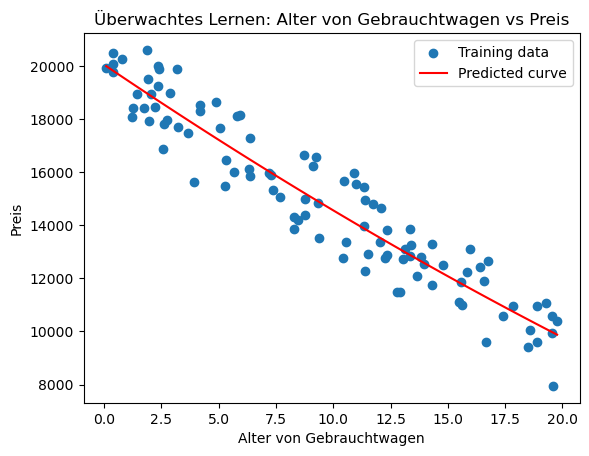

In [2]:
# Import von notwendigen Bibliotheken
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Erstellen von Beispieldaten
np.random.seed(0)
x = np.random.uniform(0, 20, 100)  # Alter der Gebrauchtwagen
y = 20000 - (x**2 + x*500 + np.random.normal(0, 1000, 100))  # Preis der Gebrauchtwagen

# Daten für das Training vorbereiten
x_train = x.reshape(-1, 1)
y_train = y

# Polynomial Features erstellen
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)

# Modell erstellen und trainieren
model = LinearRegression()
model.fit(x_train_poly, y_train)

# Vorhersage für den Plot erstellen
x_new = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
x_new_poly = poly.transform(x_new)
y_new = model.predict(x_new_poly)

# Daten und Vorhersagelinie plotten
plt.scatter(x, y, label='Training data')
plt.plot(x_new, y_new, color='red', label='Predicted curve')
plt.xlabel('Alter von Gebrauchtwagen')
plt.ylabel('Preis')
plt.legend()
plt.title('Überwachtes Lernen: Alter von Gebrauchtwagen vs Preis')
plt.show()

## Unüberwachtes Lernen (Beispiel-Diagramm):

In diesem Beispiel erzeugen wir zunächst einen Beispieldatensatz mit make_blobs. Dann verwenden wir den K-Means-Algorithmus, um den Datensatz in 5 Cluster zu unterteilen. Schließlich visualisieren wir die Datenpunkte und die Zentren der erzeugten Cluster.

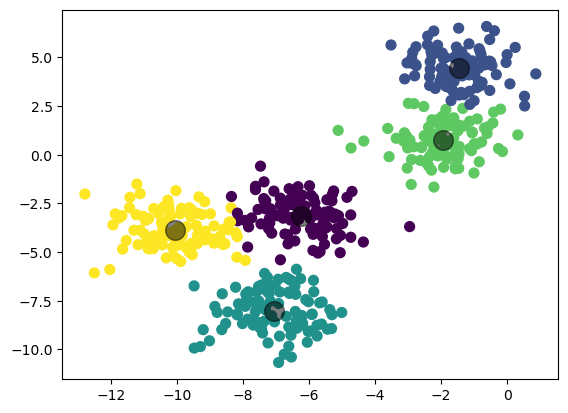

In [3]:
# Import von notwendigen Bibliotheken
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Deaktiviere Warnungen
import warnings
warnings.filterwarnings('ignore')

# Erzeugen Sie ein Beispieldatensatz mit 5 Zentren
X, y = make_blobs(n_samples=500, centers=5, random_state=1)

# Führen Sie KMeans aus
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# Vorhersagen der Clusterlabels
labels = kmeans.predict(X)

# Visualisieren Sie die Datenpunkte und die erzeugten Cluster
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

# Zeichnen Sie die Zentren der Cluster
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

plt.show()


## Bestärkendes Lernen (Beispiel-Diagramm)

In diesem Code erstellen wir eine Bandit-Klasse, die einen Hebel mit einem bestimmten wahren Mittelwert repräsentiert. Wenn der Hebel gezogen wird (pull), gibt er eine zufällige Belohnung um diesen Mittelwert herum. Die update-Methode aktualisiert die Schätzung des Mittelwerts basierend auf der zuletzt gezogenen Belohnung.

Die Funktion run_experiment führt das Experiment für eine bestimmte Anzahl von Versuchen durch. Mit einer Wahrscheinlichkeit von ε wählt sie einen zufälligen Hebel, sonst den Hebel mit der höchsten geschätzten Belohnung. Nach jedem Zug aktualisiert sie die Schätzung für den gezogenen Hebel und speichert die Belohnung. Am Ende stellt sie die kumulative durchschnittliche Belohnung für jeden Hebel im Laufe der Zeit dar.

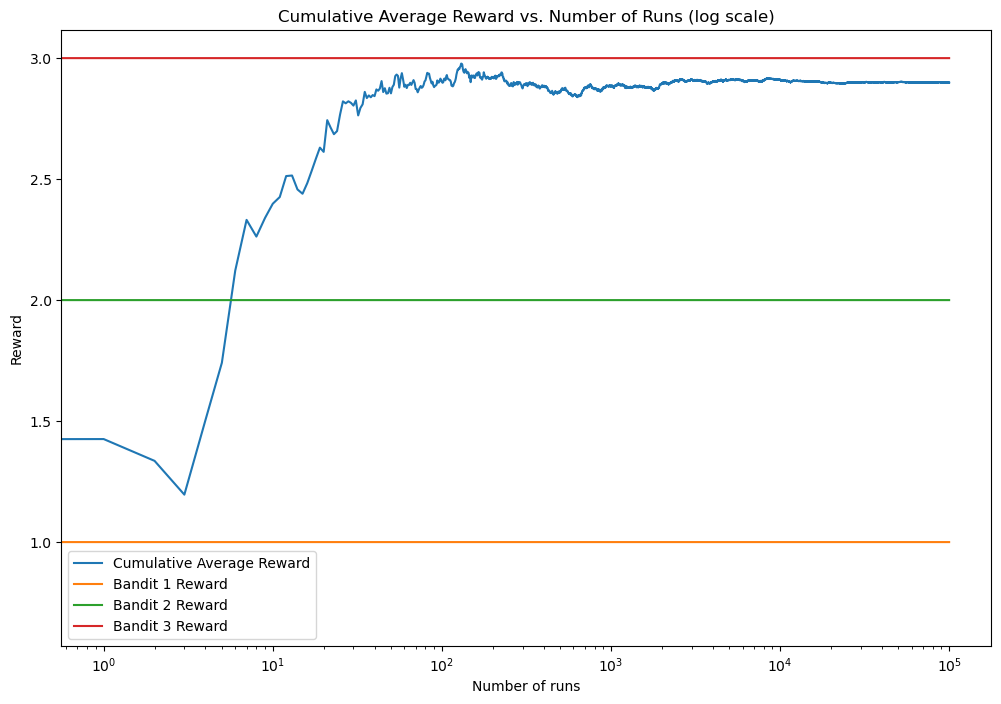

In [7]:
import numpy as np
import matplotlib.pyplot as plt

class Bandit:
    def __init__(self, m):
        self.m = m
        self.mean = 0
        self.N = 0

    def pull(self):
        return np.random.randn() + self.m

    def update(self, x):
        self.N += 1
        self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x

def run_experiment(m1, m2, m3, eps, N):
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]

    data = np.empty(N)
  
    for i in range(N):
        # ε-greedy
        p = np.random.random()
        if p < eps:
            j = np.random.choice(3)
        else:
            j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)

        # für die Darstellung
        data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    # plotten
    plt.figure(figsize=(12,8))
    plt.plot(cumulative_average, label="Cumulative Average Reward")
    plt.plot(np.ones(N)*m1, label="Bandit 1 Reward")
    plt.plot(np.ones(N)*m2, label="Bandit 2 Reward")
    plt.plot(np.ones(N)*m3, label="Bandit 3 Reward")
    plt.xscale('log')
    plt.xlabel("Number of runs")
    plt.ylabel("Reward")
    plt.legend()
    plt.title("Cumulative Average Reward vs. Number of Runs (log scale)")
    plt.show()

run_experiment(1.0, 2.0, 3.0, 0.1, 100000)


## Anmerkungen

Die notwendigen Machine Learning und Python Grundlagen sollen mit der Zeit Schritt-für-Schritt auf dem Blog <a href="https://www.disruvation.com">https://www.disruvation.com</a> erklärt werden. 